In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('C:/Users/Anu Shamaiah Prasad/Downloads/Powerplant_India.csv')

In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 908
No of Columns: 25


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df.isin(['','NA','-','?']).sum().any()

False

In [7]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data', 'gppd_idnr','owner','other_fuel3','other_fuel2','estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
latitude                            46        5.066079
longitude                           46        5.066079
geolocation_source                  19        2.092511
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


In [11]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   908.000000  862.000000  862.000000          528.000000   
mean    321.046378   21.196189   77.447848         1996.876894   
std     580.221767    6.248627    4.907260           17.047817   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.837500   16.771575   74.258975         1988.000000   
50%      60.000000   21.778300   76.719250         2000.000000   
75%     388.125000   25.516375   79.441475         2011.250000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           384.000000           401.000000           425.000000   
mean           2304.059202          2420.393316          2414.072373   
std            3794.767492          4013.558173          4183.203199   
min               0.000000             0.000000             0.000000   
25%             244.458088           223.650436           174.174750   
50%             797.063475           805.760000           701.027250   
75%            2795.021500          3034.575000          3080.000000   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           437.000000           443.000000  
mean           2453.936292          2531.754458  
std            4152.038216          4187.236364  
min               0.000000             0.000000  
25%             187.193669           177.643170  
50%             716.728350           807.601700  
75%            3263.483000          3258.785000  
max           30015.000000         35116.000000

In [12]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [13]:
df.loc[df.capacity_mw==4760]

name  capacity_mw  latitude  longitude primary_fuel  \
881  VINDH_CHAL STPS       4760.0   24.0983    82.6719         Coal   

    other_fuel1  commissioning_year                         source  \
881         Oil              2002.0  Central Electricity Authority   

    geolocation_source  generation_gwh_2013  generation_gwh_2014  \
881                WRI             26761.39              27594.0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
881              29047.0              30015.0              35116.0   

            generation_data_source  
881  Central Electricity Authority

In [14]:
df.loc[df.capacity_mw==0]

name  capacity_mw  latitude  \
830  Tata BP - Electronics City Solar Panel Plant          0.0   12.8491   

     longitude primary_fuel other_fuel1  commissioning_year  \
830    77.6752        Solar         NaN                 NaN   

                          source geolocation_source  generation_gwh_2013  \
830  Tata BP Solar India Limited     Industry About                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
830                  NaN                  NaN                  NaN   

     generation_gwh_2017 generation_data_source  
830                  NaN                    NaN

In [15]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

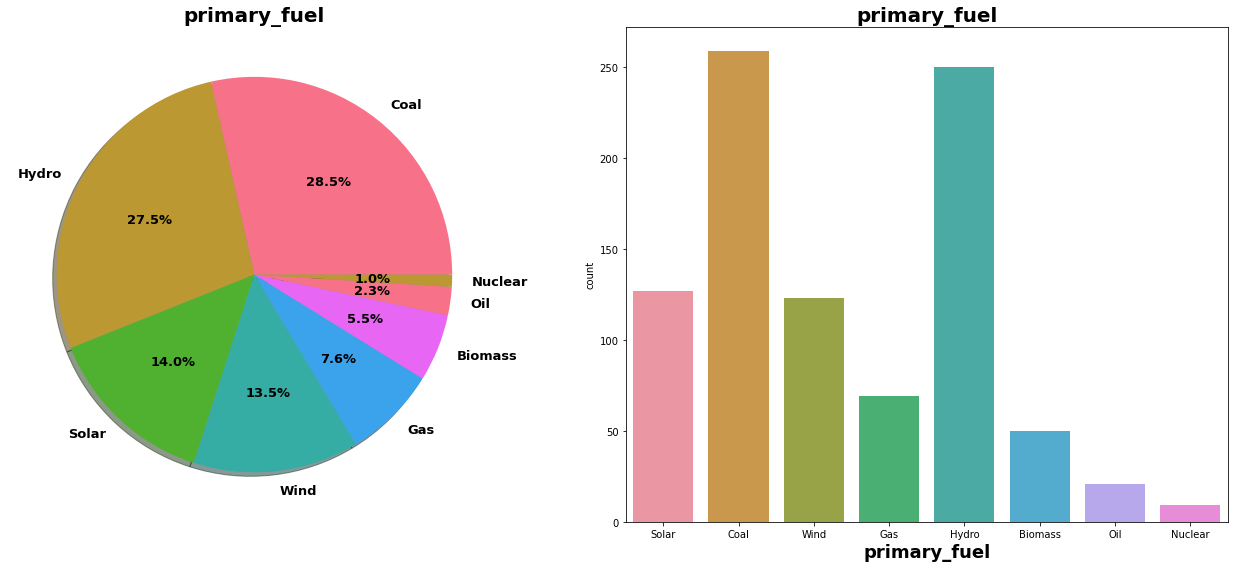

In [16]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [17]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [18]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 291510.11100000003 MW


In [19]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

sum
primary_fuel            
Biomass         1003.260
Coal          201423.220
Gas            25123.871
Hydro          46331.570
Nuclear         8780.000
Oil             1978.840
Solar           2757.500
Wind            4111.850

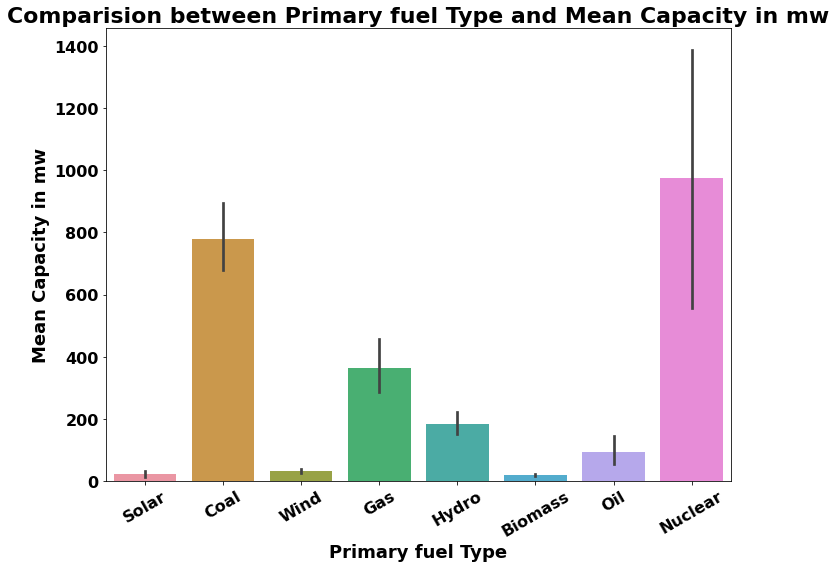

In [20]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

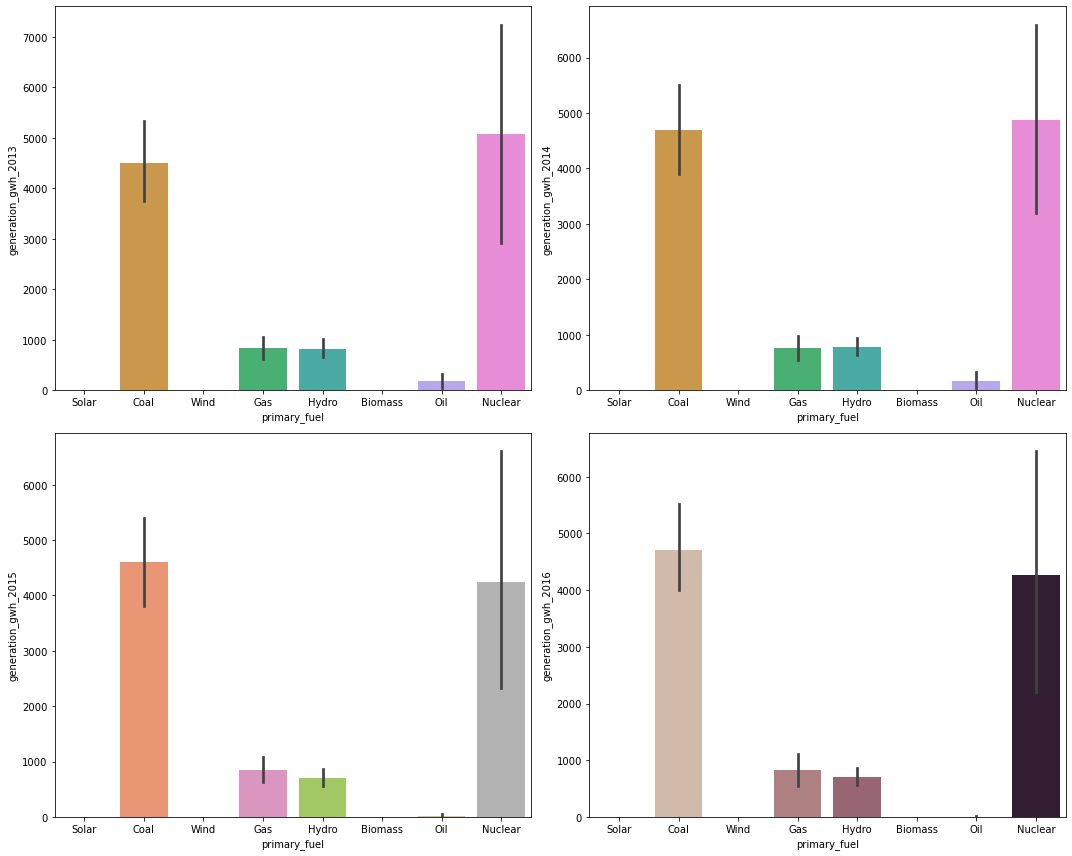

In [21]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

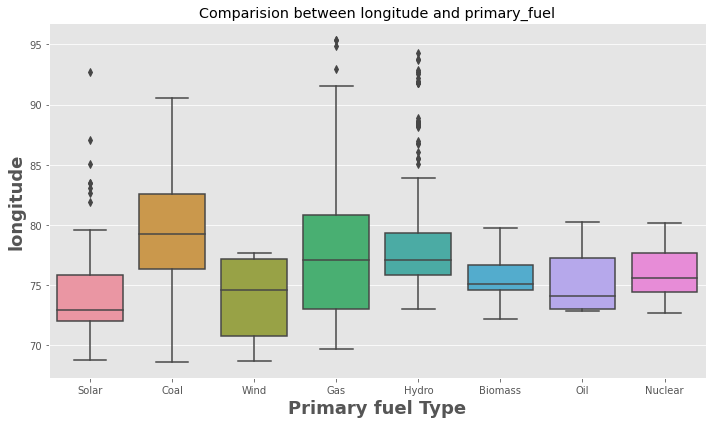

In [22]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

In [23]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [24]:
df.loc[df.Power_plant_age==91]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
729  SIVASAMUNDRUM         42.0   12.3082     77.165        Hydro         NaN   

                            source geolocation_source  generation_gwh_2013  \
729  Central Electricity Authority                WRI            217.97465   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
729            220.82035             215.3777             144.4143   

     generation_gwh_2017         generation_data_source  Power_plant_age  
729            175.92595  Central Electricity Authority             91.0

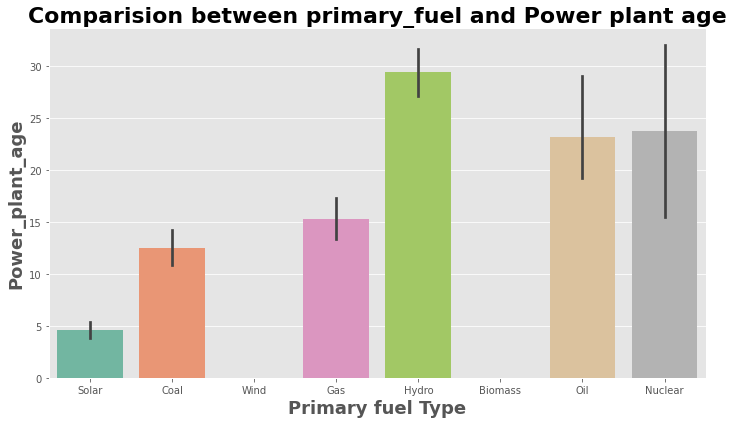

In [25]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

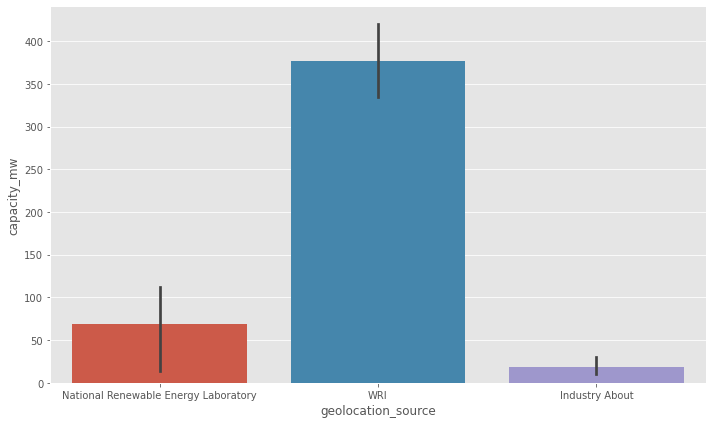

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

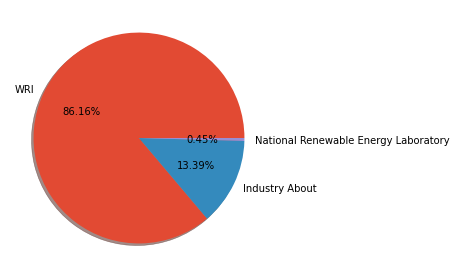

In [27]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

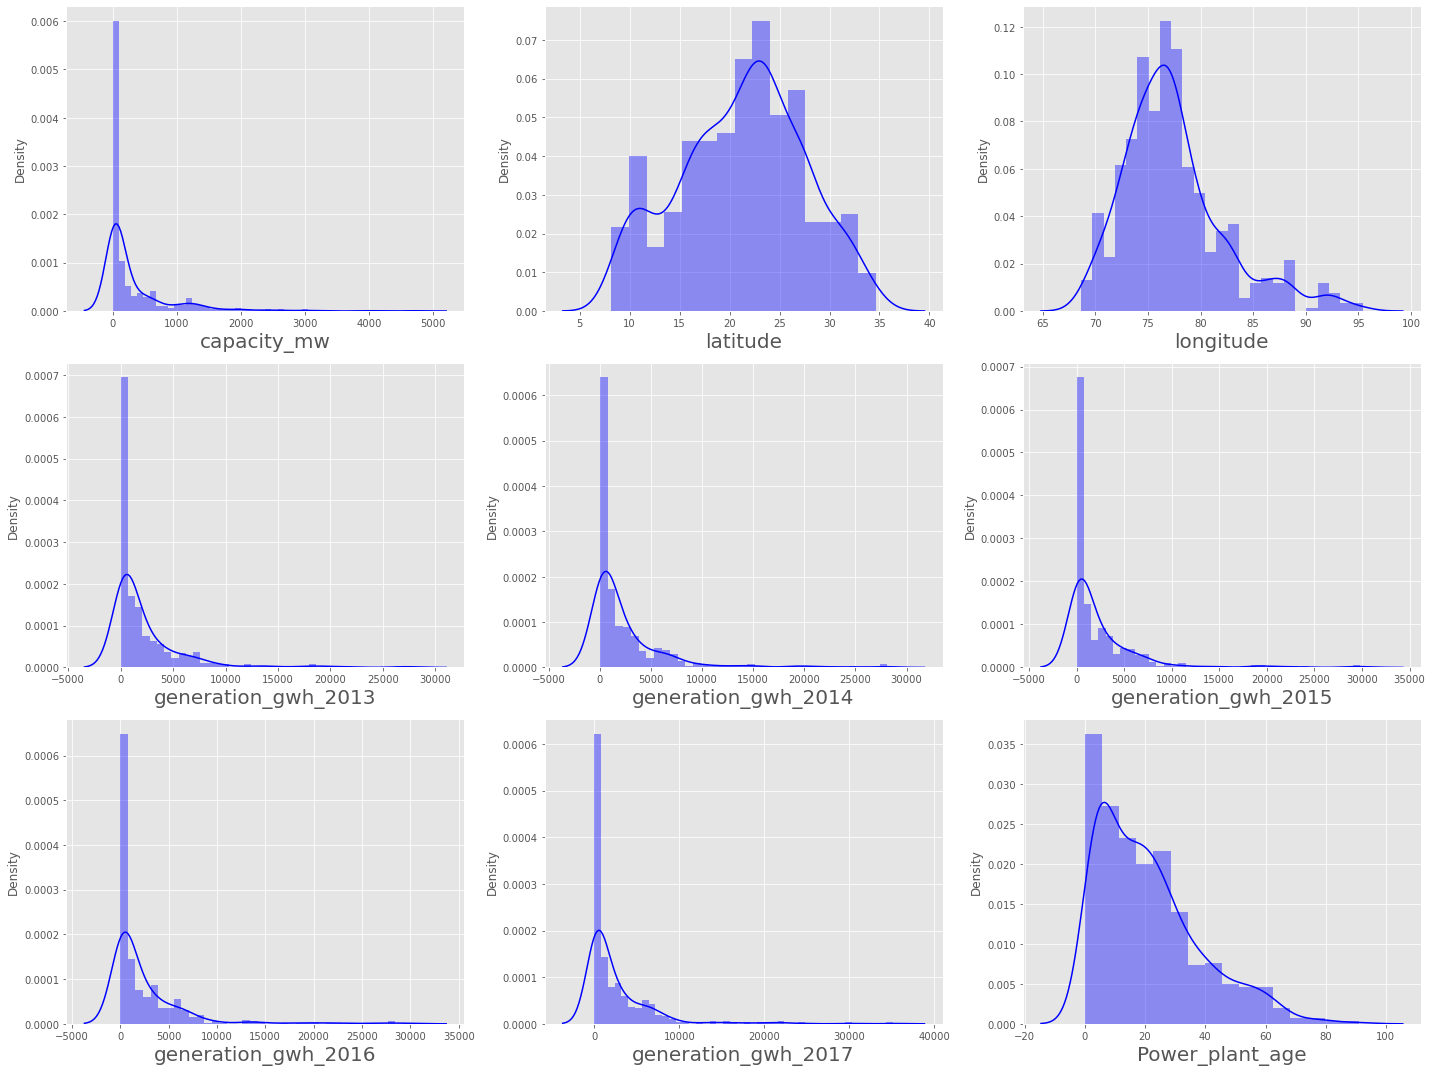

In [28]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

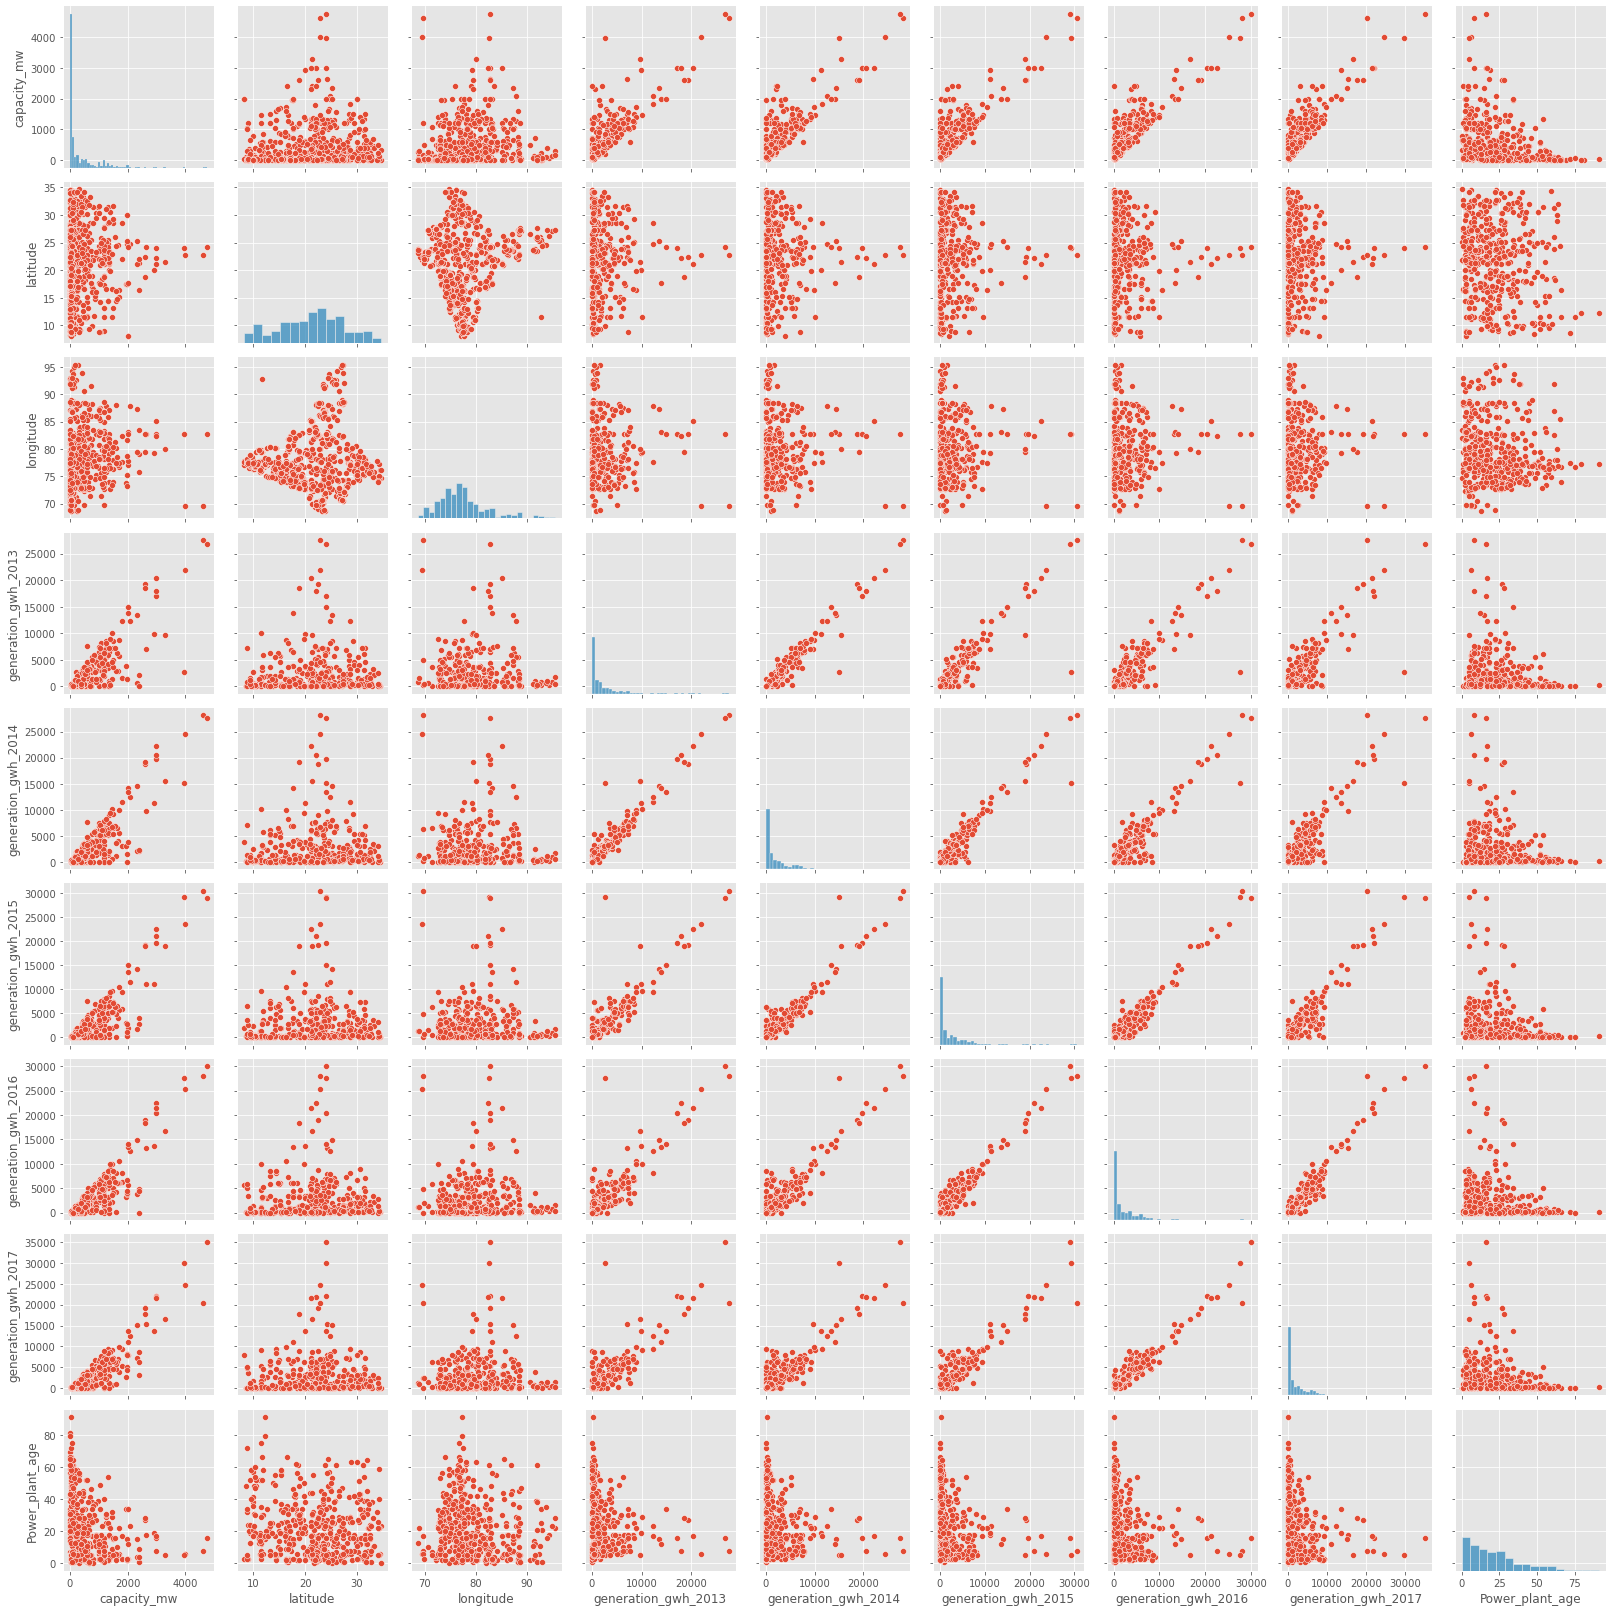

In [29]:
sns.pairplot(df)

In [30]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [31]:
df2=df.copy

In [32]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.244515
longitude                13.623640
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [33]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 13)


In [34]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


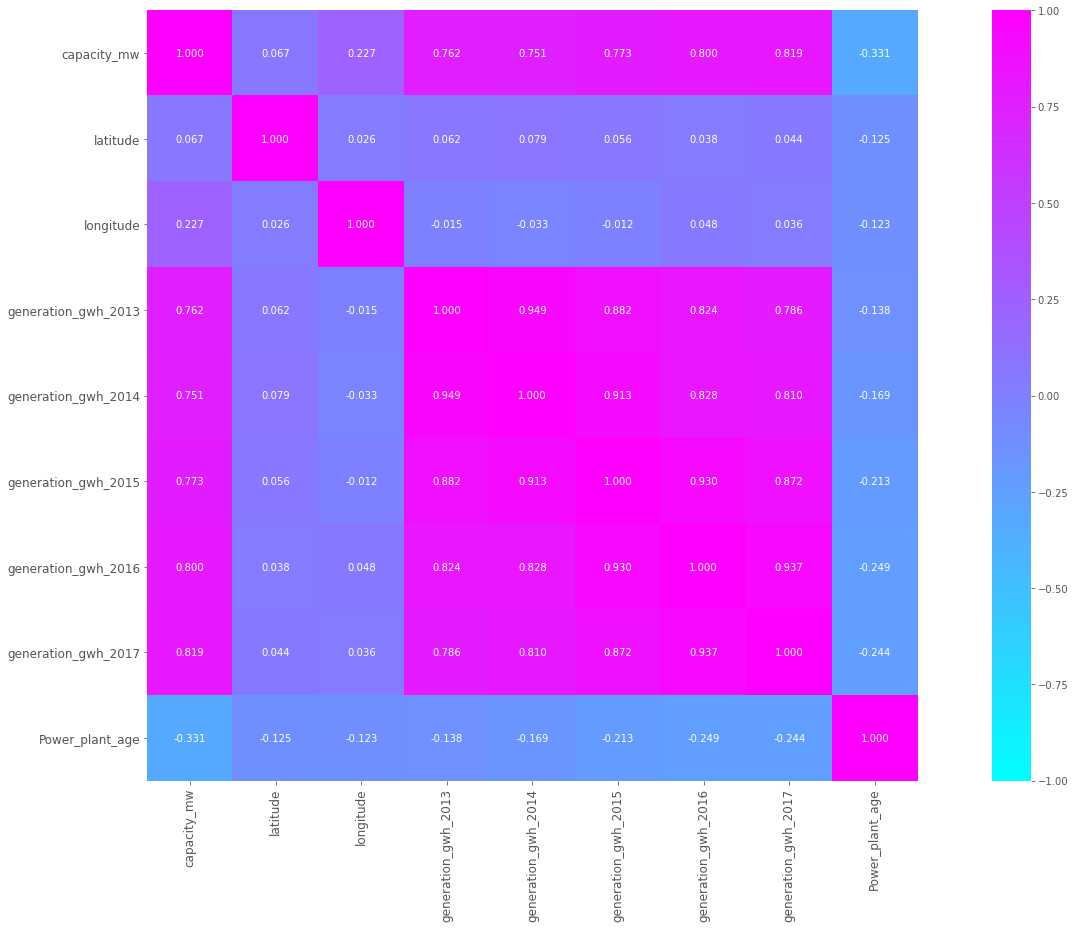

In [35]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

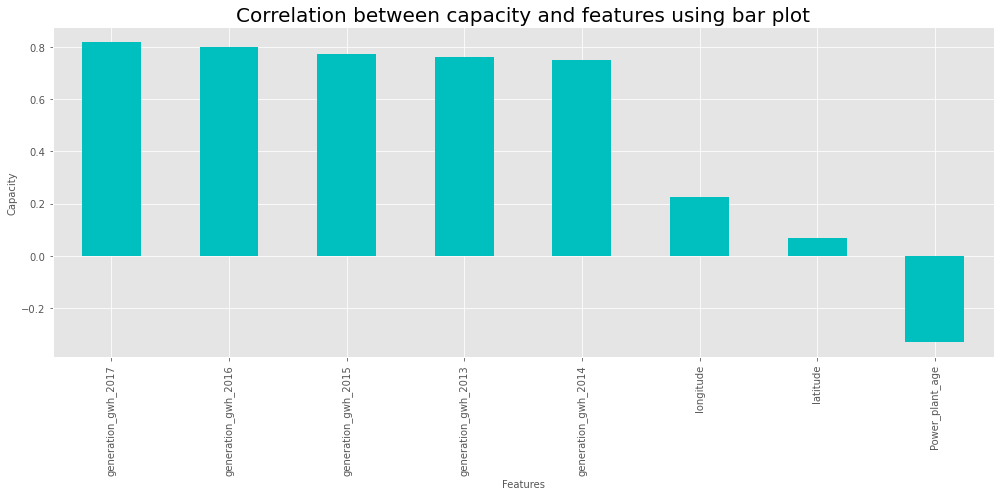

In [36]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

In [39]:
data.skew()

capacity_mw            1.916893
latitude              -0.128306
longitude              1.161307
generation_gwh_2013    1.669040
generation_gwh_2014    1.623857
generation_gwh_2015    1.530908
generation_gwh_2016    1.604813
generation_gwh_2017    1.495215
Power_plant_age        1.014046
dtype: float64

In [40]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [44]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

ValueError: could not convert string to float: 'ACME Solar Tower'

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'X_scale' is not defined

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

NameError: name 'X_scale' is not defined

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'X_scale' is not defined

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'X_scale' is not defined

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'X_scale' is not defined

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'X_scale' is not defined

In [52]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

NameError: name 'X_scale' is not defined

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [55]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [56]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

NameError: name 'X_train' is not defined

In [57]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

NameError: name 'X_test' is not defined

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
#from xgboost import XGBRegressor

In [60]:
df2=df.copy()

In [61]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.244515
longitude                13.623640
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [62]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 13)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

NameError: name 'X_scale' is not defined

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :


NameError: name 'Y_test' is not defined

In [67]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
#xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')

NameError: name 'xgb' is not defined

In [68]:
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')

NameError: name 'xgb' is not defined

In [69]:
#Temperature Forecast Project using ML
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv('C:/Users/Anu Shamaiah Prasad/Downloads/temperature.csv')

In [71]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 7752
No of Columns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [72]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

In [73]:
df.duplicated().sum()

0

In [74]:
df.isin([' ','NA','-']).sum().any()

False

In [75]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

In [76]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [77]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

In [80]:
import reverse_geocoder as rg
import pprint
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

ModuleNotFoundError: No module named 'reverse_geocoder'

In [81]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

NameError: name 'geo_names' is not defined

In [82]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

In [83]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               Day        Month         Year  
count  7588.000000  7588.000000  7588.000000  
mean     16.337375     7.068134  2014.991697  
std       8.216880     2.242389     1.410877  
min       7.000000     1.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000    12.000000  2017.000000

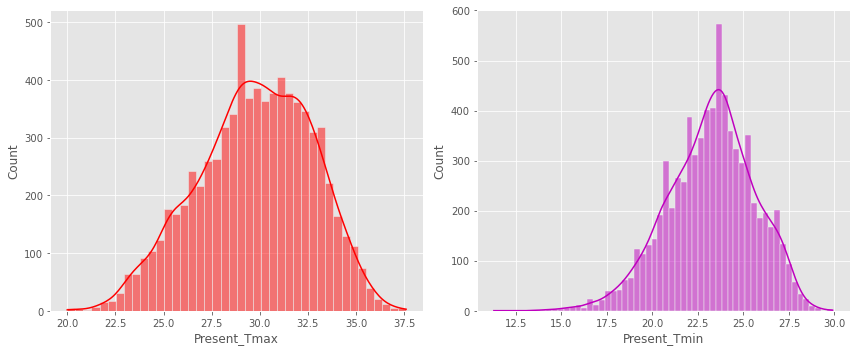

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

In [85]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801227
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377487


In [86]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
5717      5082.563477       37.0       27.8    8     11  2016

In [87]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
7725       4614.76123       23.8       15.1   30      8  2017

In [88]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
2397      5360.226563       31.3       24.8    8      2  2014

In [89]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
6116      4539.616699       24.6       17.1   27      8  2016

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

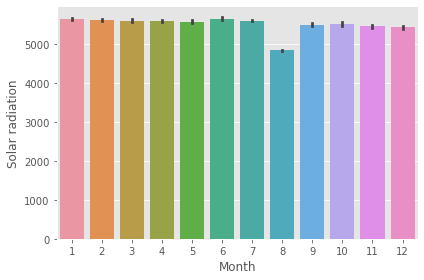

In [90]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


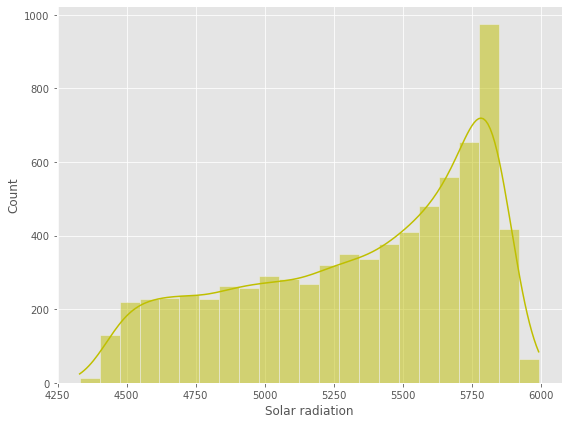

In [91]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

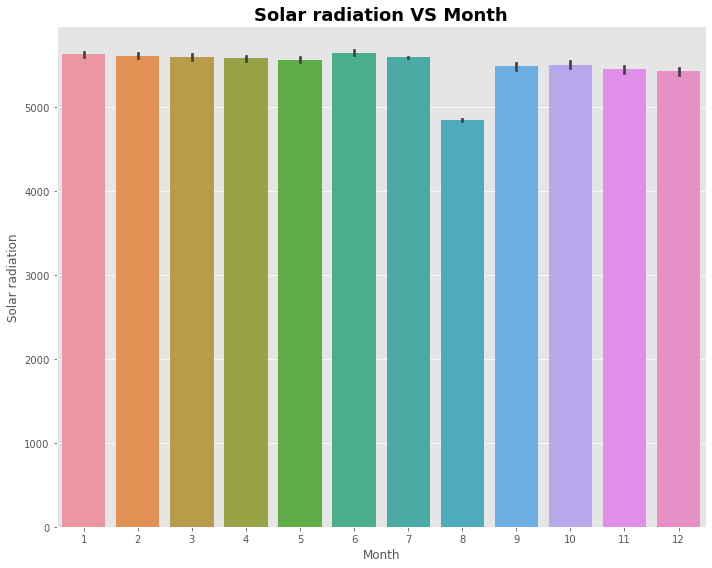

In [92]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

In [93]:
df.shape

(7588, 28)

TypeError: Horizontal orientation requires numeric `x` variable.

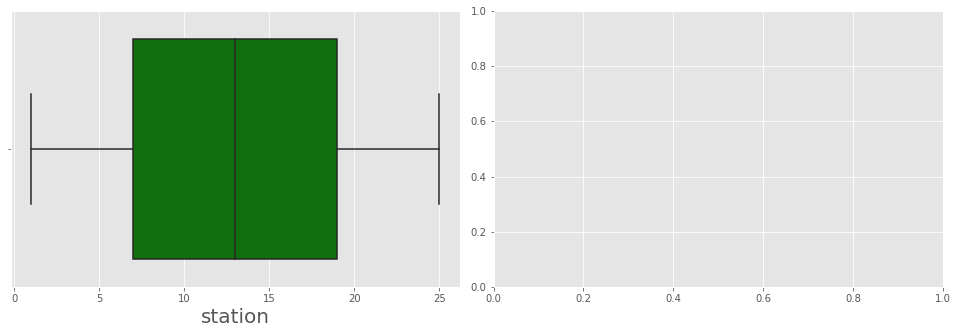

In [94]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

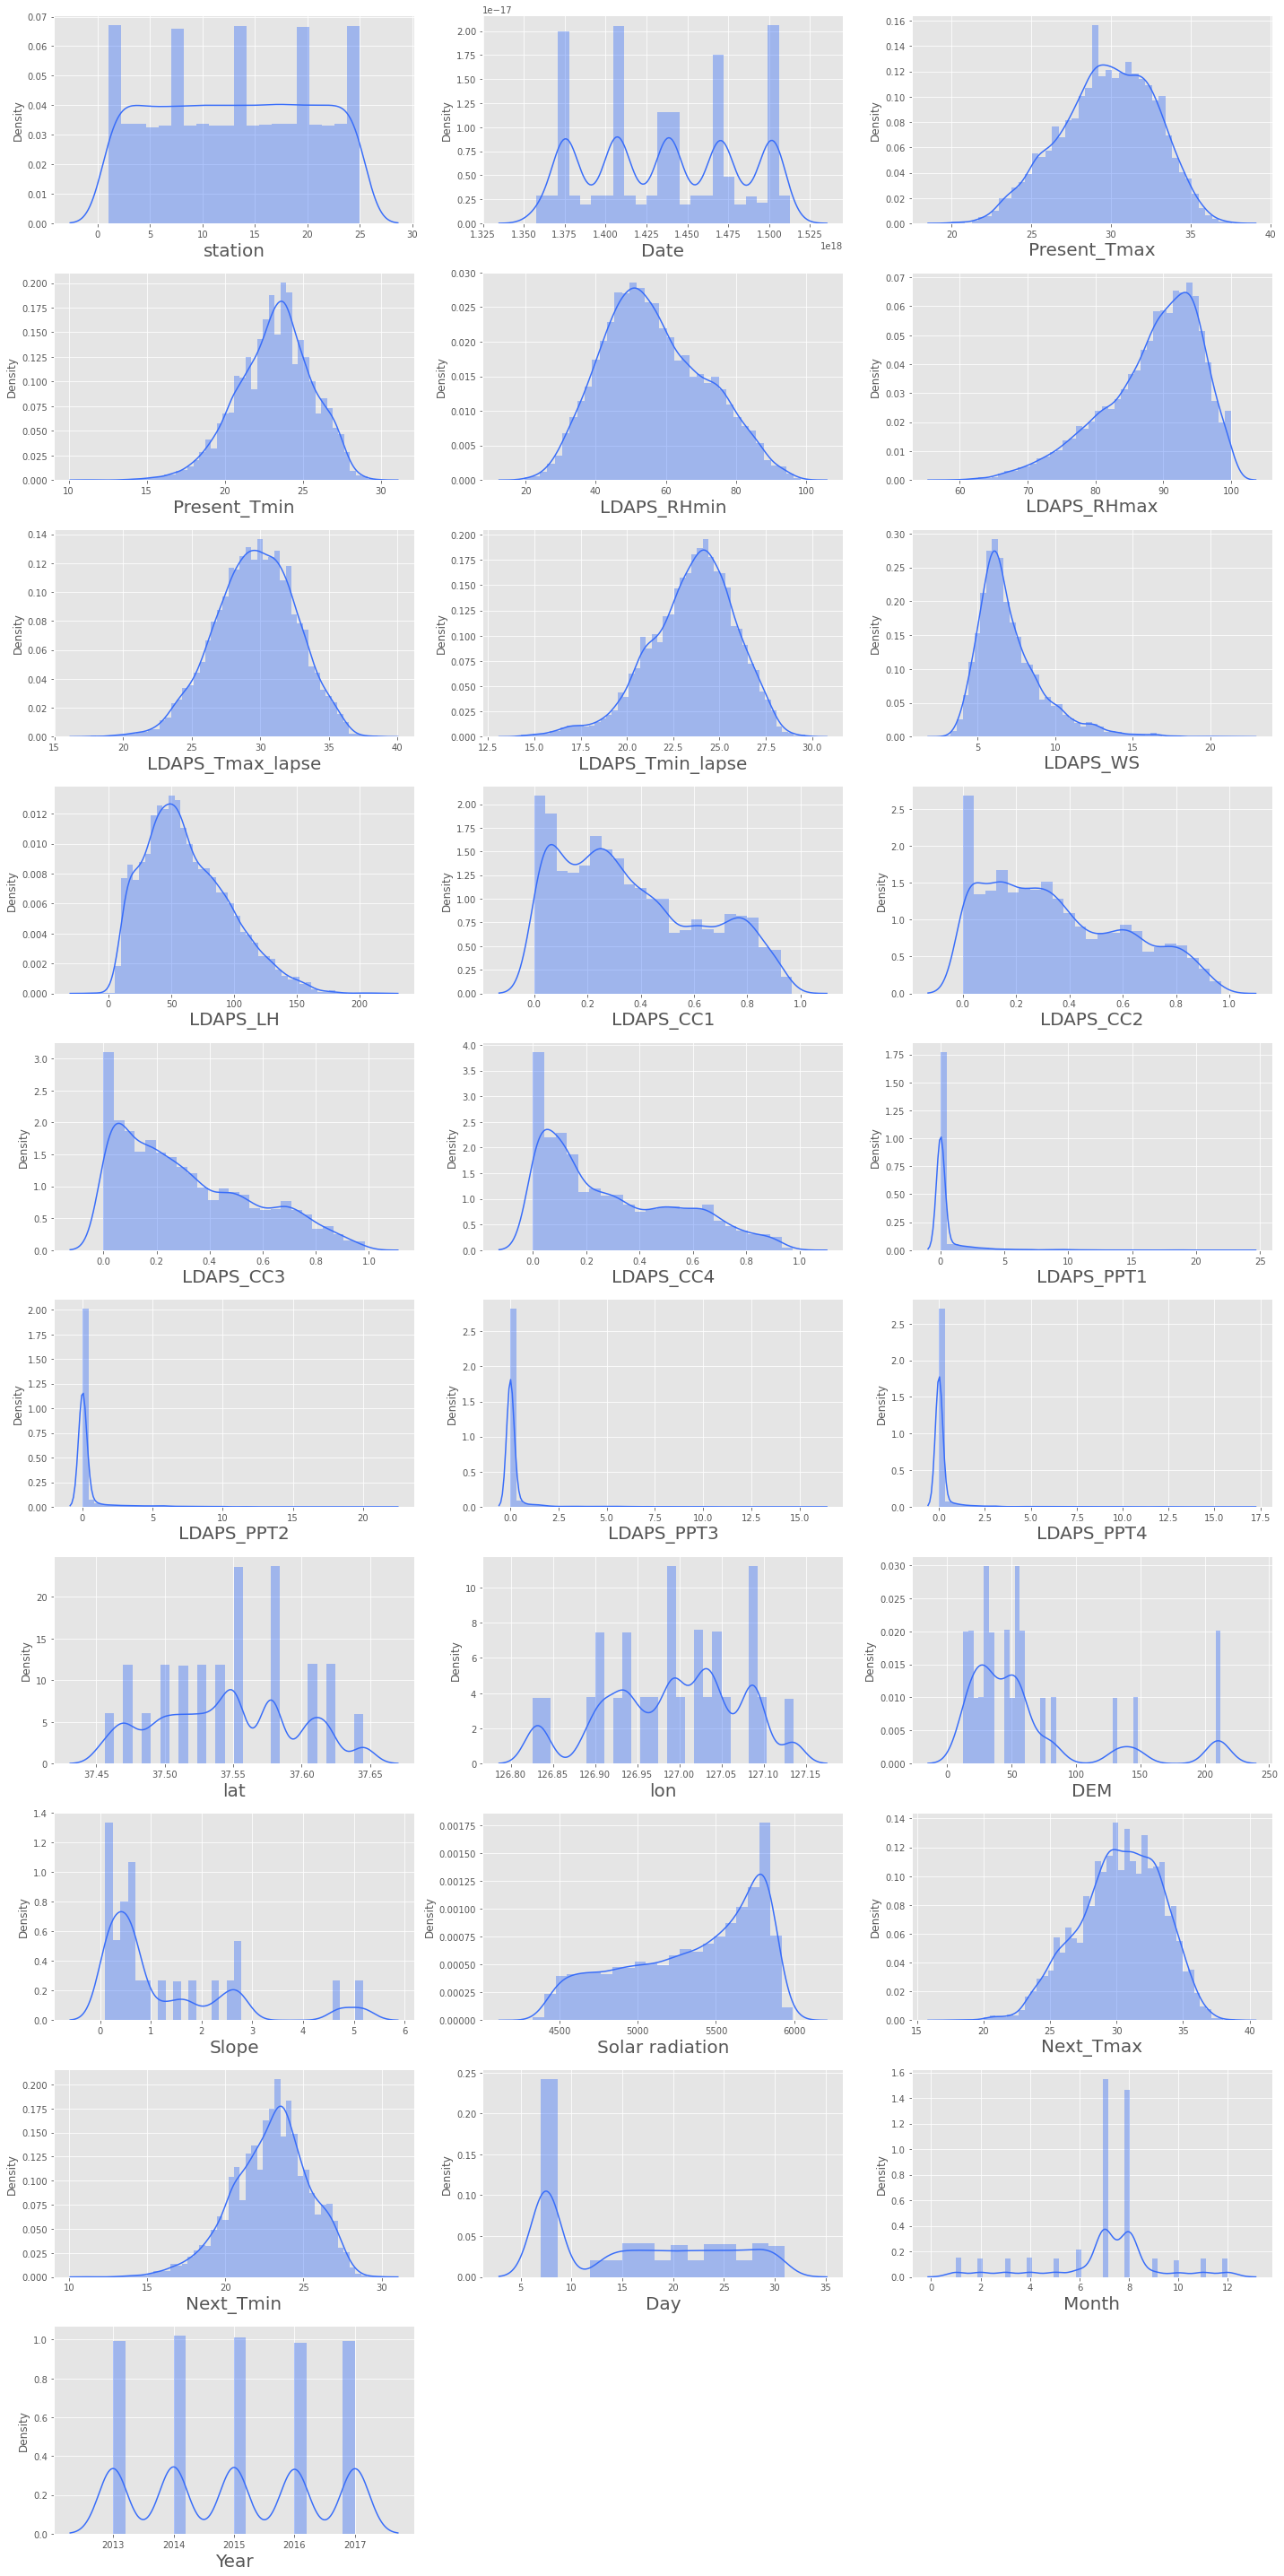

In [96]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [97]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

In [98]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Day                 -0.012226         -0.161320        

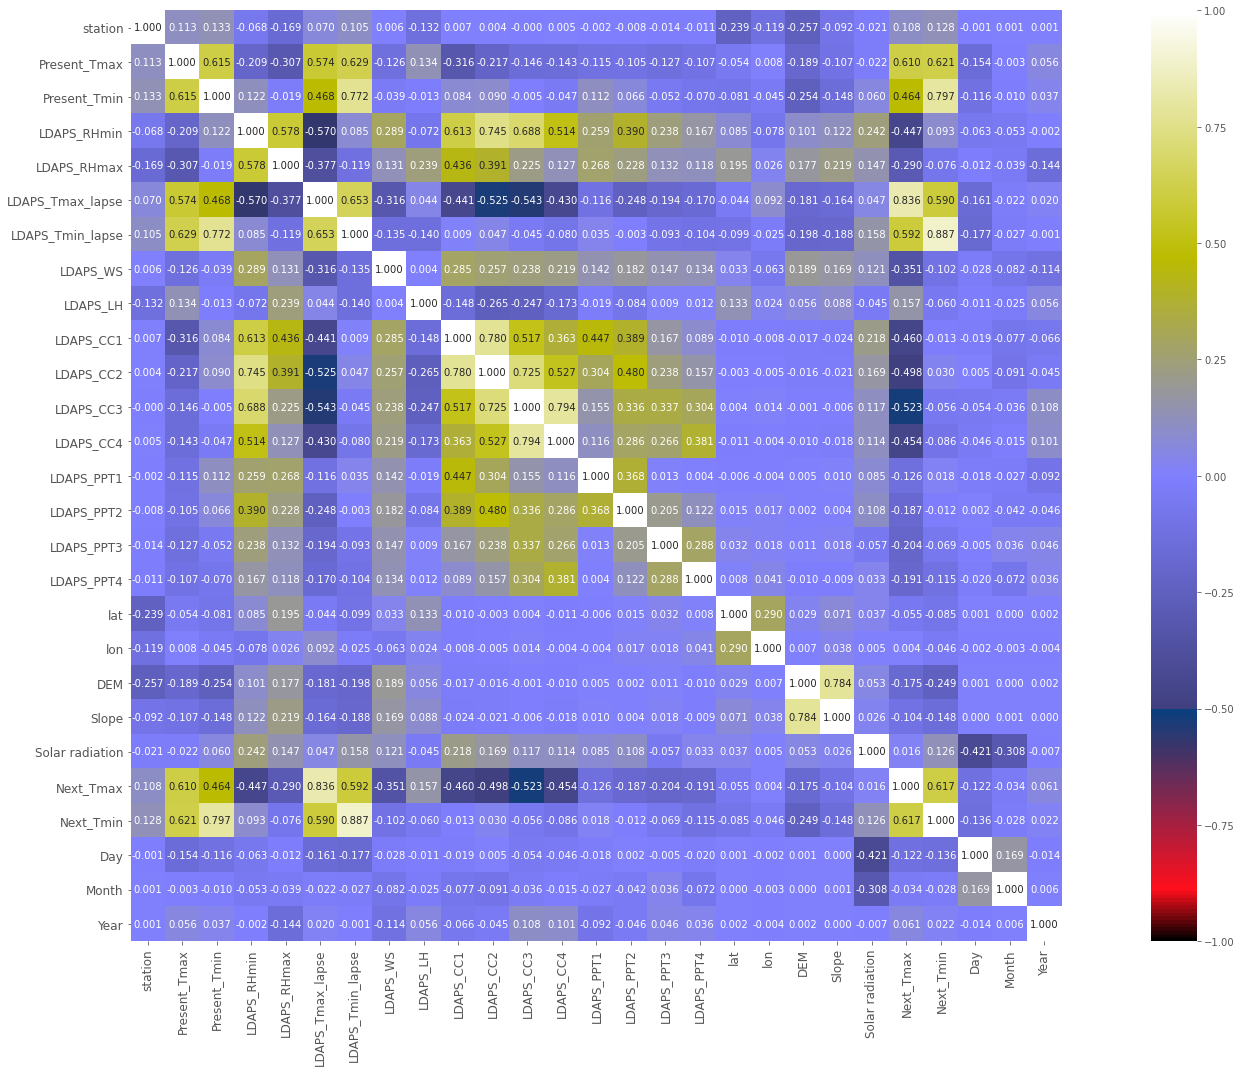

In [99]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [100]:
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [101]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

TypeError: invalid type promotion

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

NameError: name 'X_scale' is not defined

In [103]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

NameError: name 'X_scale' is not defined

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'principle_x' is not defined

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

NameError: name 'X_scale' is not defined

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

NameError: name 'X_scale' is not defined

In [109]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :


NameError: name 'Y_test' is not defined

In [110]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

NameError: name 'lin_reg' is not defined

In [111]:
from sklearn.ensemble import BaggingRegressor

In [114]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
#xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')

NameError: name 'X_train' is not defined

In [115]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')

NameError: name 'xgb' is not defined

In [117]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [118]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

NameError: name 'XGBRegressor' is not defined

In [119]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [120]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

NameError: name 'XGBRegressor' is not defined

In [121]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

NameError: name 'Y_test' is not defined

In [122]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [123]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

TypeError: invalid type promotion

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'X_scale' is not defined

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

NameError: name 'X_scale' is not defined

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

NameError: name 'X_scale' is not defined

In [127]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :


NameError: name 'Y_test' is not defined

In [128]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

NameError: name 'lin_reg' is not defined

In [129]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')

NameError: name 'XGBRegressor' is not defined

In [1]:
##Loan Application Status Prediction

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/Anu Shamaiah Prasad/Downloads/loan_prediction.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [12]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


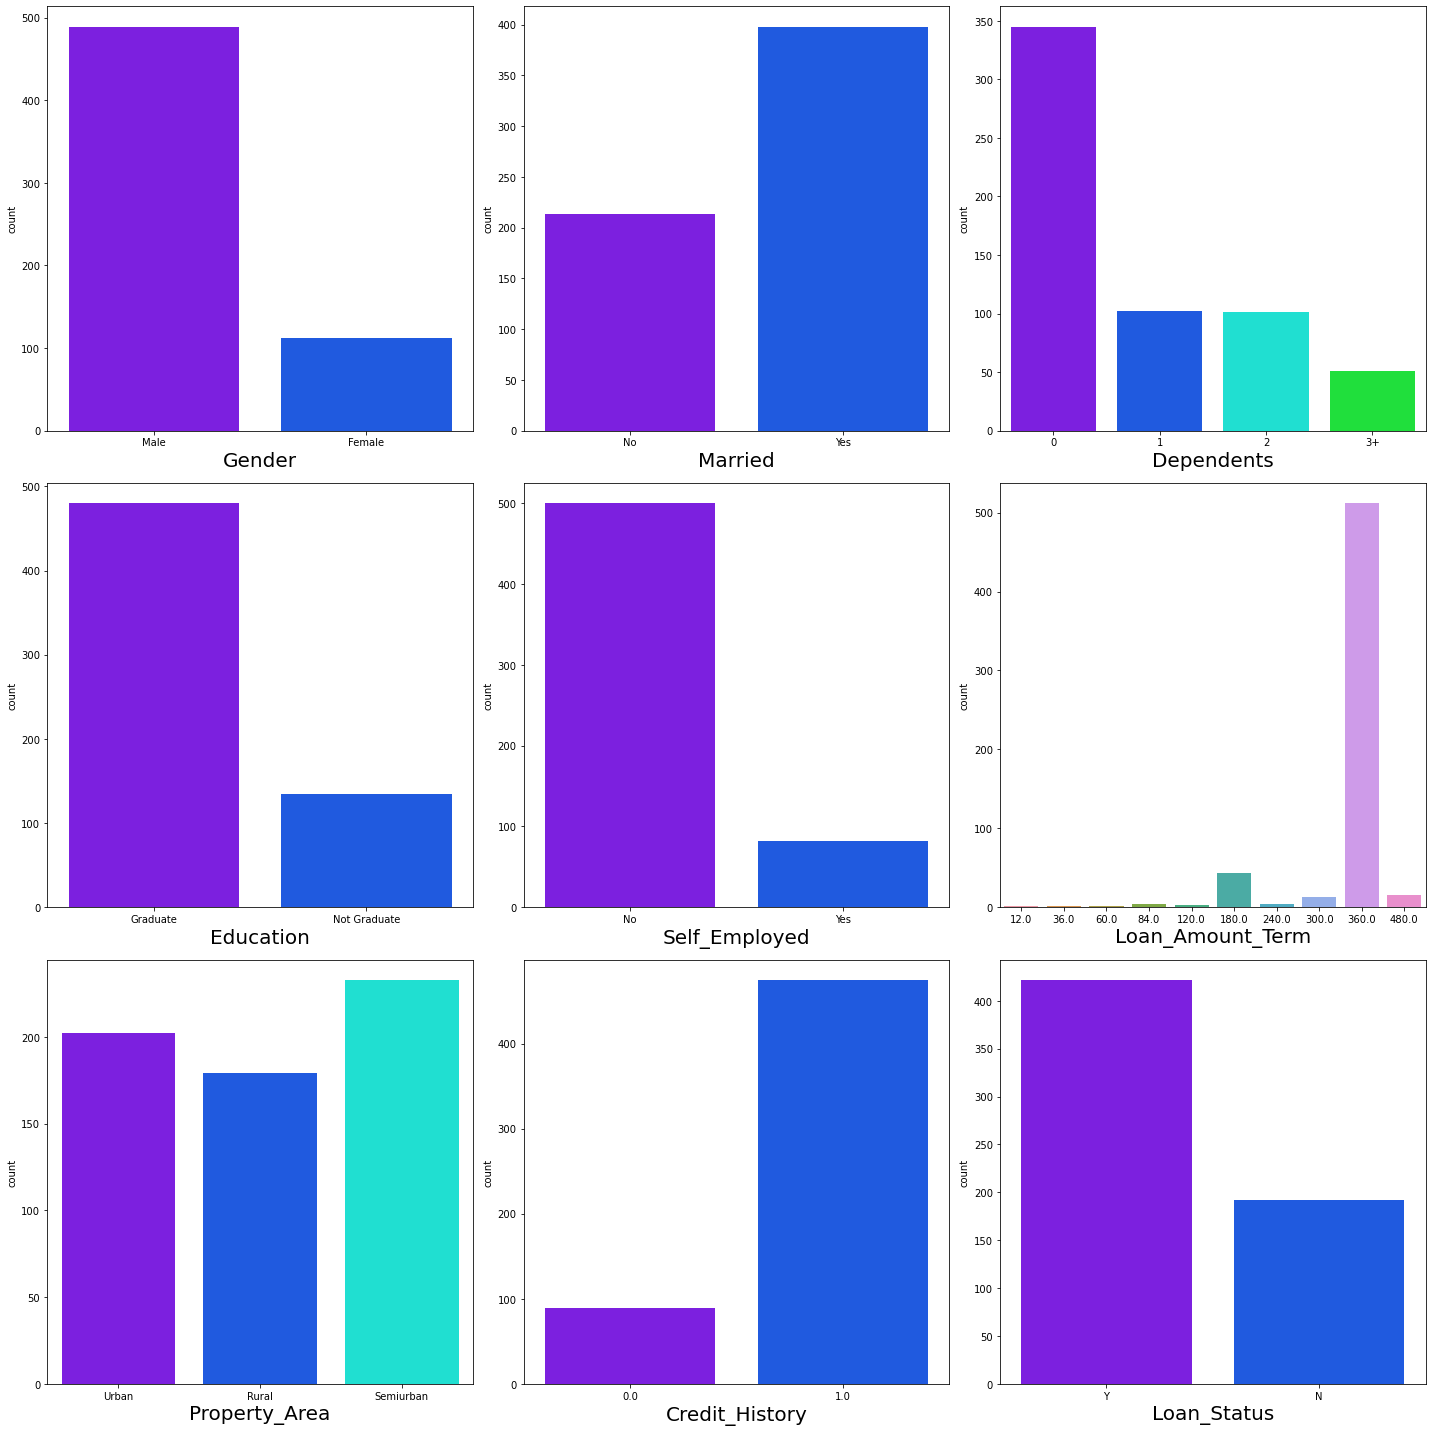

In [13]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [14]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [15]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<AxesSubplot:>

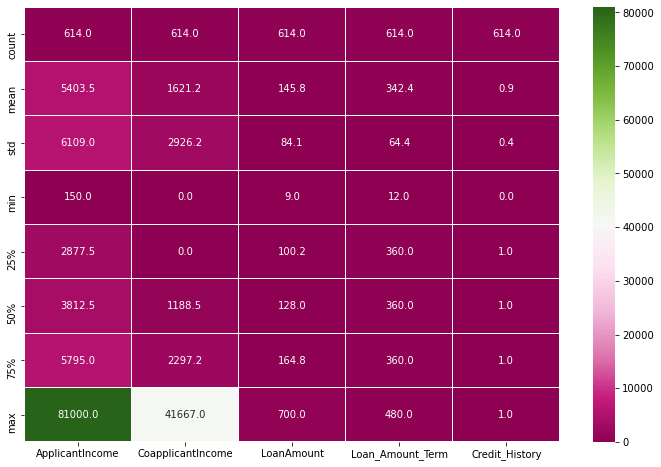

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [18]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

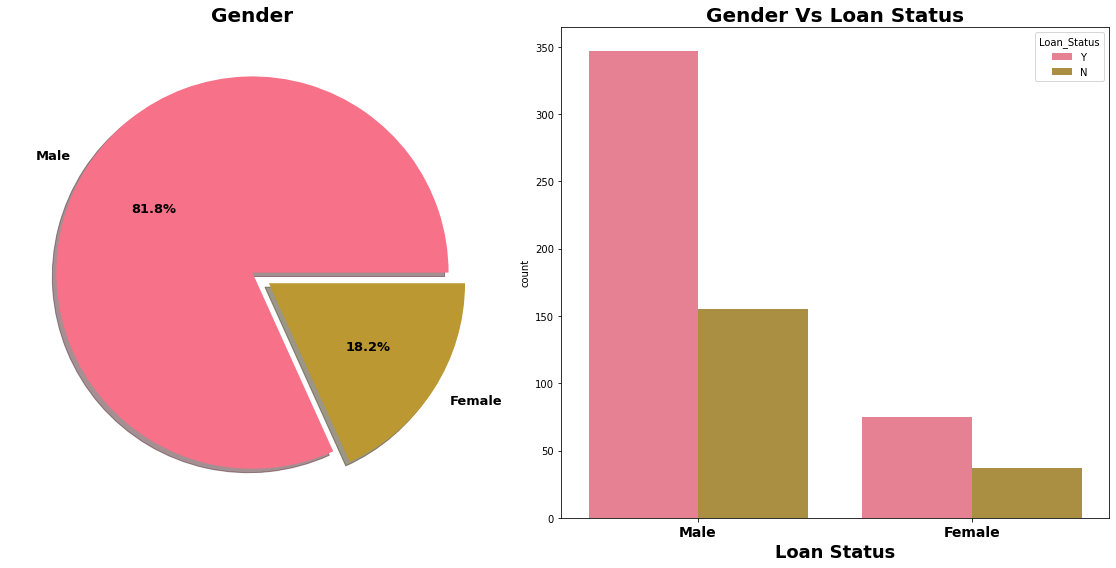

In [19]:
#Gender VS Loan Status
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [20]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

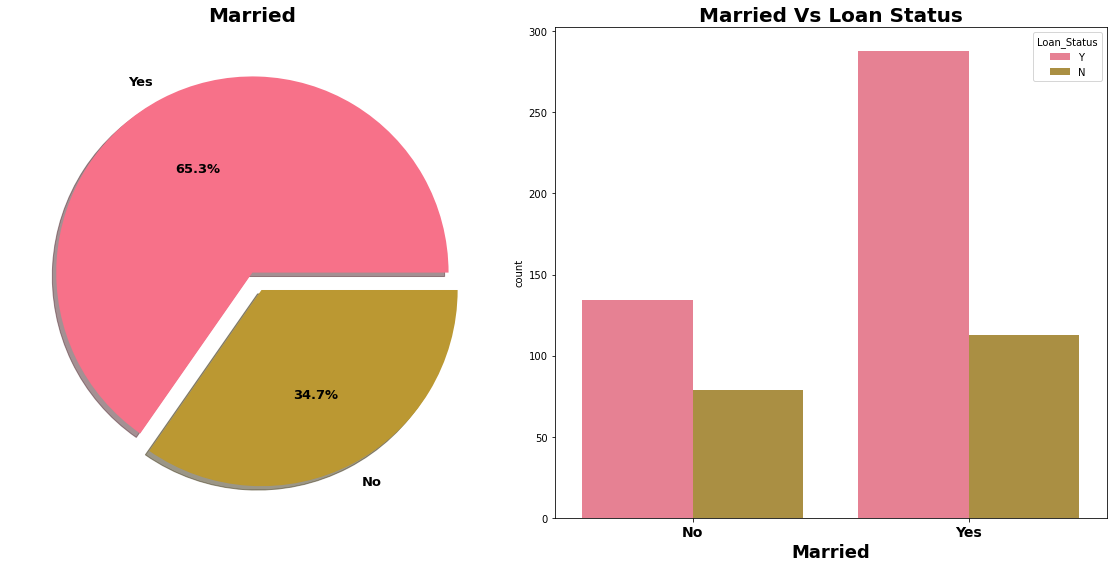

In [21]:
#Married vs LOan Ststus
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()



In [23]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow')

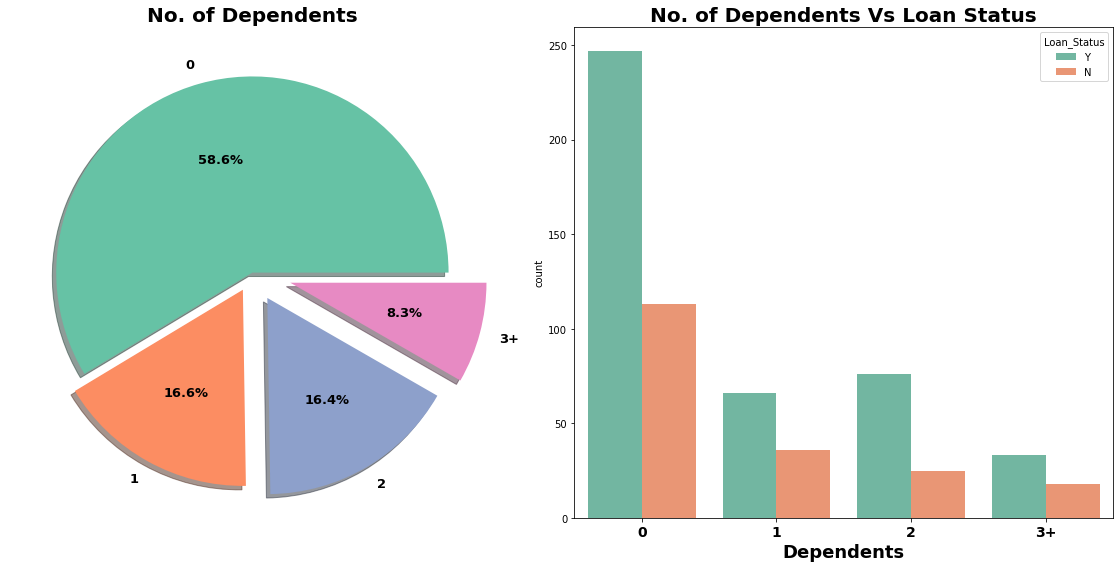

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [25]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [26]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [27]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

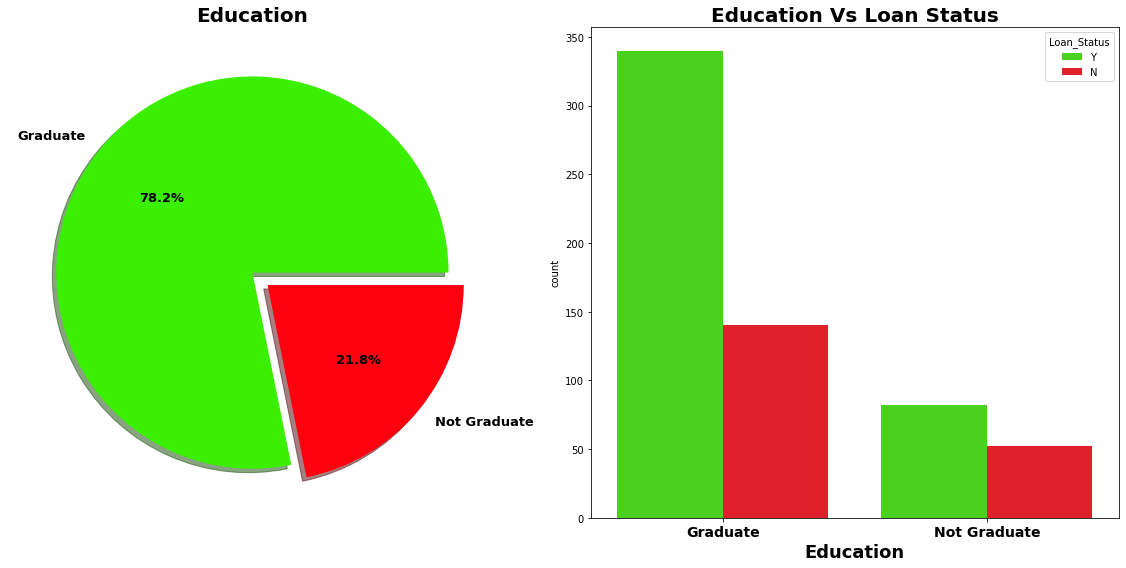

In [28]:
#Education Vs Loan status
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [29]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [30]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [31]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [33]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

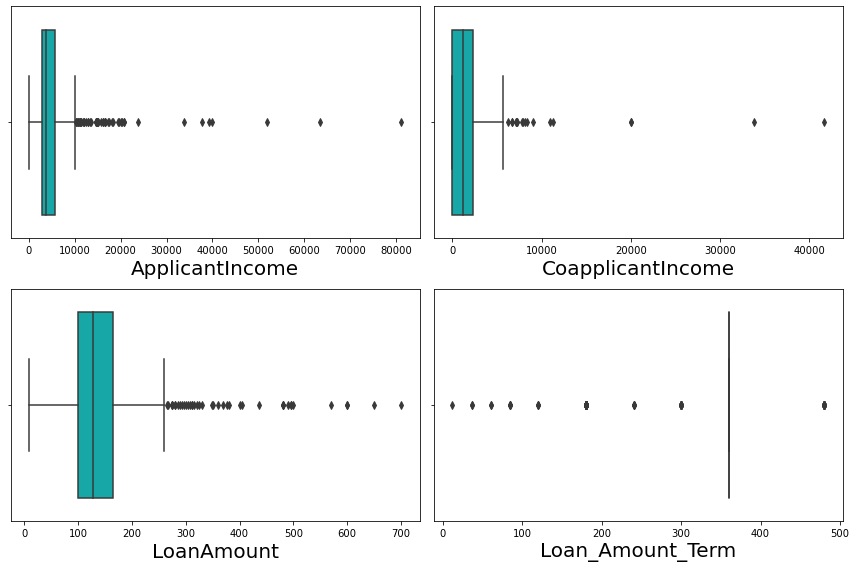

In [34]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [35]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [36]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [37]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [38]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [39]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


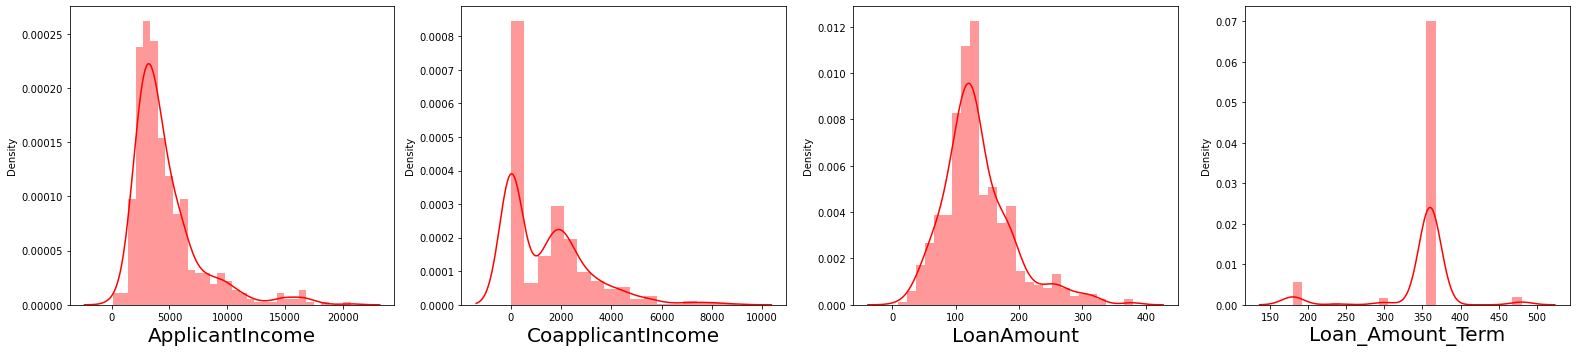

In [40]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [41]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

ApplicantIncome  CoapplicantIncome  LoanAmount
0         0.681780          -1.122446    0.000771
1         0.234783           0.744117    0.000771
2        -0.527201          -1.122446   -1.437336
3        -0.791972           0.895786   -0.153545
4         0.728848          -1.122446    0.238260

In [43]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [44]:
df.corr()

Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.378997    0.188162   0.045696      -0.006207   
Married            0.378997  1.000000    0.329900   0.024817      -0.015779   
Dependents         0.188162  0.329900    1.000000   0.069814       0.044543   
Education          0.045696  0.024817    0.069814   1.000000      -0.007139   
Self_Employed     -0.006207 -0.015779    0.044543  -0.007139       1.000000   
ApplicantIncome    0.058590 -0.024783    0.105994  -0.176074       0.212260   
CoapplicantIncome  0.234551  0.335820    0.004109   0.049739      -0.087338   
LoanAmount         0.172146  0.181878    0.131772  -0.128715       0.117218   
Loan_Amount_Term  -0.104983 -0.127348   -0.087389  -0.090523      -0.032914   
Credit_History     0.013172  0.019308   -0.020288  -0.075217      -0.016390   
Property_Area     -0.026340  0.010595    0.002327  -0.068596      -0.028253   
Loan_Status        0.017408  0.089026    0.017872  -0.092658      -0.026525   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.058590           0.234551    0.172146   
Married                  -0.024783           0.335820    0.181878   
Dependents                0.105994           0.004109    0.131772   
Education                -0.176074           0.049739   -0.128715   
Self_Employed             0.212260          -0.087338    0.117218   
ApplicantIncome           1.000000          -0.360946    0.432154   
CoapplicantIncome        -0.360946           1.000000    0.200081   
LoanAmount                0.432154           0.200081    1.000000   
Loan_Amount_Term         -0.069429           0.000951    0.049057   
Credit_History            0.028825           0.006564   -0.003626   
Property_Area            -0.011364          -0.074476   -0.098090   
Loan_Status              -0.002484           0.079344   -0.023609   

                   Loan_Amount_Term  Credit_History  Property_Area  \
Gender                    -0.104983        0.013172      -0.026340   
Married                   -0.127348        0.019308       0.010595   
Dependents                -0.087389       -0.020288       0.002327   
Education                 -0.090523       -0.075217      -0.068596   
Self_Employed             -0.032914       -0.016390      -0.028253   
ApplicantIncome           -0.069429        0.028825      -0.011364   
CoapplicantIncome          0.000951        0.006564      -0.074476   
LoanAmount                 0.049057       -0.003626      -0.098090   
Loan_Amount_Term           1.000000        0.027392      -0.057004   
Credit_History             0.027392        1.000000      -0.008121   
Property_Area             -0.057004       -0.008121       1.000000   
Loan_Status               -0.020291        0.560936       0.026507   

                   Loan_Status  
Gender                0.017408  
Married               0.089026  
Dependents            0.017872  
Education            -0.092658  
Self_Employed        -0.026525  
ApplicantIncome      -0.002484  
CoapplicantIncome     0.079344  
LoanAmount           -0.023609  
Loan_Amount_Term     -0.020291  
Credit_History        0.560936  
Property_Area         0.026507  
Loan_Status           1.000000

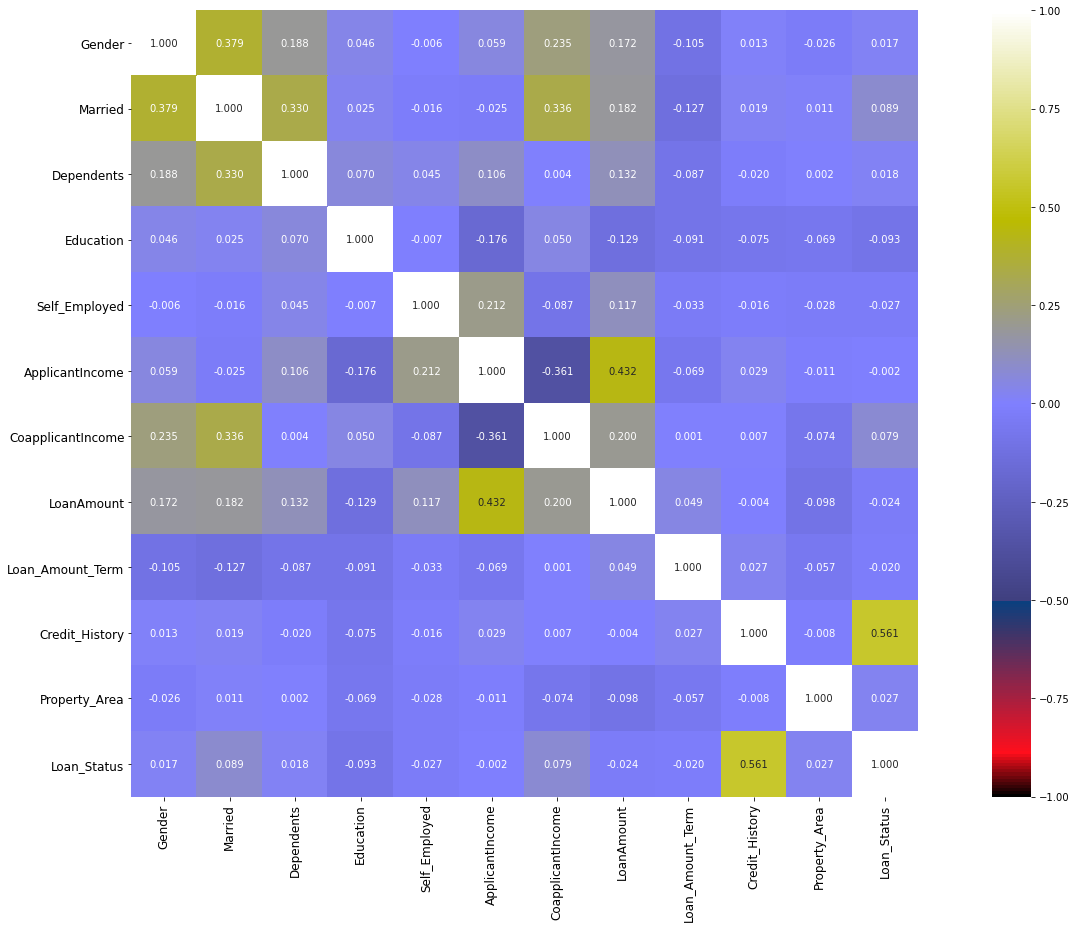

In [45]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

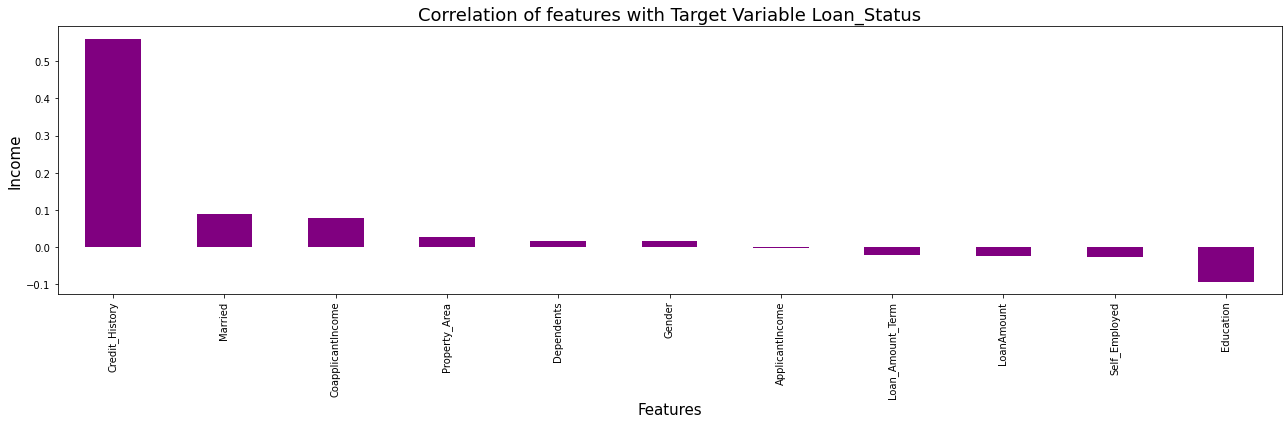

In [46]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF           Features
0    6.119789             Gender
1    3.963538            Married
2    1.778377         Dependents
3    1.355469          Education
4    1.197219      Self_Employed
5    1.756726    ApplicantIncome
6    1.596438  CoapplicantIncome
7    1.548450         LoanAmount
8   10.415255   Loan_Amount_Term
9    9.483180     Credit_History
10   2.654799      Property_Area
11   4.818436        Loan_Status

In [48]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [53]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [54]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

NameError: name 'SMOTE' is not defined

In [55]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (403, 11)
Training target vector size: (403,)
Test feature matrix size: (174, 11)
Test target vector size: (174,)


In [59]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)



Best accuracy is 0.8850574712643678 on Random_state 12


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8333333333333334


Confusion matrix of Logistics Regression : 
 [[ 22  28]
 [  1 123]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174



In [61]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.59209349991676
RMSE value for k=  2 is: 0.5872202195147035
RMSE value for k=  3 is: 0.44849685092245223
RMSE value for k=  4 is: 0.5028653529707439
RMSE value for k=  5 is: 0.4288450139351179
RMSE value for k=  6 is: 0.4420433223684922
RMSE value for k=  7 is: 0.42209112705697793
RMSE value for k=  8 is: 0.4288450139351179
RMSE value for k=  9 is: 0.4288450139351179
RMSE value for k=  10 is: 0.42209112705697793
RMSE value for k=  11 is: 0.4288450139351179
RMSE value for k=  12 is: 0.42209112705697793
RMSE value for k=  13 is: 0.4288450139351179
RMSE value for k=  14 is: 0.42209112705697793
RMSE value for k=  15 is: 0.42209112705697793
RMSE value for k=  16 is: 0.41522739926869984
RMSE value for k=  17 is: 0.41522739926869984
RMSE value for k=  18 is: 0.408248290463863
RMSE value for k=  19 is: 0.41522739926869984
RMSE value for k=  20 is: 0.41522739926869984
RMSE value for k=  21 is: 0.41522739926869984
RMSE value for k=  22 is: 0.41522739926869984
RMSE value

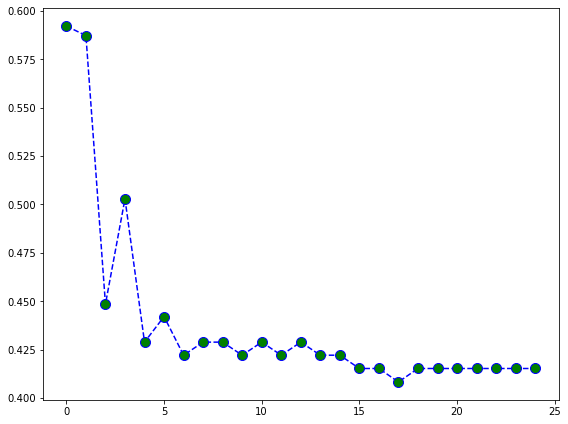

In [62]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8390804597701149


Confusion matrix : 
 [[ 23  27]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.46      0.62        50
           1       0.82      0.99      0.90       124

    accuracy                           0.84       174
   macro avg       0.89      0.73      0.76       174
weighted avg       0.86      0.84      0.82       174





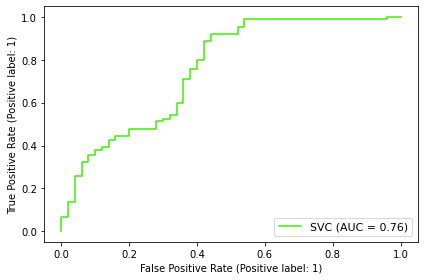

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8333333333333334


Confusion matrix : 
 [[ 22  28]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174





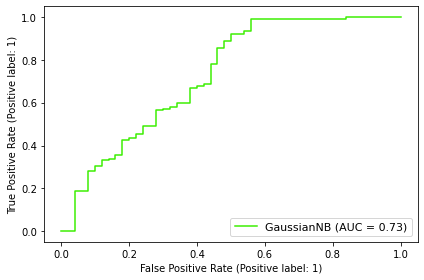

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7528735632183908


Confusion matrix : 
 [[ 30  20]
 [ 23 101]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.60      0.58        50
           1       0.83      0.81      0.82       124

    accuracy                           0.75       174
   macro avg       0.70      0.71      0.70       174
weighted avg       0.76      0.75      0.75       174





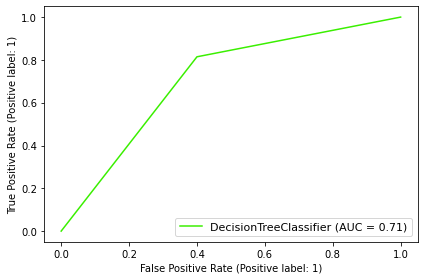

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7988505747126436


Confusion matrix : 
 [[ 22  28]
 [  7 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.44      0.56        50
           1       0.81      0.94      0.87       124

    accuracy                           0.80       174
   macro avg       0.78      0.69      0.71       174
weighted avg       0.79      0.80      0.78       174





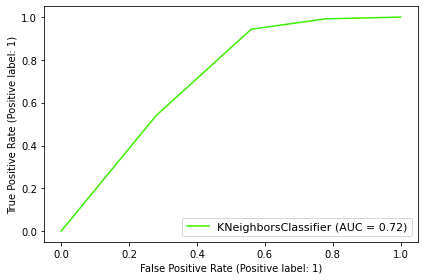

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.7931034482758621


Confusion matrix : 
 [[ 25  25]
 [ 11 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.50      0.58        50
           1       0.82      0.91      0.86       124

    accuracy                           0.79       174
   macro avg       0.76      0.71      0.72       174
weighted avg       0.78      0.79      0.78       174





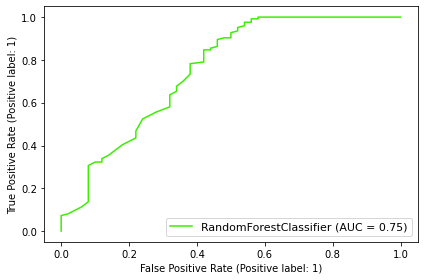

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.764367816091954


Confusion matrix : 
 [[ 25  25]
 [ 16 108]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.50      0.55        50
           1       0.81      0.87      0.84       124

    accuracy                           0.76       174
   macro avg       0.71      0.69      0.69       174
weighted avg       0.75      0.76      0.76       174





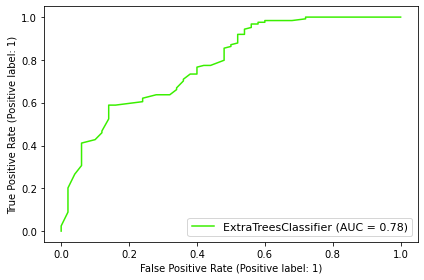

In [65]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('========================================================================================================')

In [66]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('========================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
Mean Score : 0.8180809595202397
Std deviation : 0.02649724741088433




Cross Validation Score SVC() :

Score : [0.81896552 0.78448276 0.79130435 0.86086957 0.83478261]
Mean Score : 0.8180809595202397
Std deviation : 0.028129764814348753




Cross Validation Score GaussianNB() :

Score : [0.81034483 0.79310345 0.79130435 0.85217391 0.8173913 ]
Mean Score : 0.812863568215892
Std deviation : 0.02203365599787896




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70689655 0.70689655 0.67826087 0.77391304 0.73043478]
Mean Score : 0.71928035982009
Std deviation : 0.031932639283733064




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.75862069 0.76724138 0.71304348 0.79130435 0.72173913]
Mean Score : 0.7503898050974513
Std deviation : 0.029125013674020518




Cross Validation Score RandomForestClassifier() :

Score : [0.78448276 0.79310345 

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [69]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV 5/5; 1/168] START bootstrap=True, criterion=gini, max

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [70]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 50}

In [71]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8218390804597702


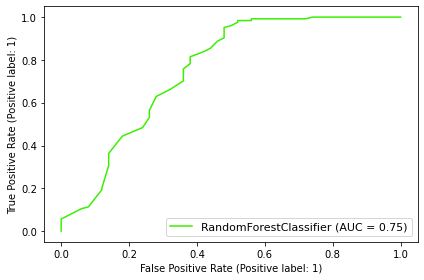

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.7317741935483871


In [72]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)